In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [5]:
# Weight and Bias, initialized randomly
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Linear_regression (Wx + b)
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred - y_true, 2) / (2 * n_samples))

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [7]:
# Optimize processes
def run_optimization():
    # Wrap computation inside a GradientTape for audo diff
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    
    # compute gradients
    gradients = g.gradient(loss, [W, b])
    # apply_gradients(grads_and_vars)， Apply gradients to variables
    # 在相应的变量上应用梯度，即在最优化的问题上应用梯度，W, b
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" %
              (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.106042, W: 0.154899, b: 1.484612
step: 100, loss: 0.102712, W: 0.160599, b: 1.444203
step: 150, loss: 0.099764, W: 0.165963, b: 1.406175
step: 200, loss: 0.097152, W: 0.171011, b: 1.370388
step: 250, loss: 0.094839, W: 0.175762, b: 1.336710
step: 300, loss: 0.092791, W: 0.180232, b: 1.305016
step: 350, loss: 0.090977, W: 0.184439, b: 1.275189
step: 400, loss: 0.089370, W: 0.188398, b: 1.247120
step: 450, loss: 0.087947, W: 0.192124, b: 1.220704
step: 500, loss: 0.086687, W: 0.195631, b: 1.195846
step: 550, loss: 0.085571, W: 0.198931, b: 1.172451
step: 600, loss: 0.084582, W: 0.202036, b: 1.150436
step: 650, loss: 0.083707, W: 0.204958, b: 1.129717
step: 700, loss: 0.082932, W: 0.207709, b: 1.110219
step: 750, loss: 0.082245, W: 0.210297, b: 1.091870
step: 800, loss: 0.081637, W: 0.212733, b: 1.074602
step: 850, loss: 0.081099, W: 0.215025, b: 1.058351
step: 900, loss: 0.080622, W: 0.217182, b: 1.043059
step: 950, loss: 0.080199, W: 0.219212, b: 1.028667
step: 1000, l

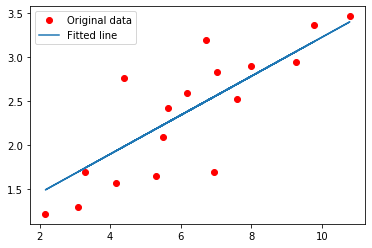

In [9]:
plt.plot(X, Y, 'ro', label="Original data")
plt.plot(X, np.array(W * X + b), label="Fitted line")
plt.legend()
plt.show()